#**Data Mining Project**
---
#### Classification on Breast Cancer Wisconsin (Diagnostic) Data Set


### Importing libaries required





In [ ]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

# Classification algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

### Loading Data into DataFrame

In [ ]:
url = "https://raw.githubusercontent.com/dhwanimp3/Breast-Cancer-Wisconsin-Diagnostic-Data-Set/main/data.csv"
df = pd.read_csv(url)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### Data pre-processing



In [ ]:
# No.of rows & columns in the original dataset before preprocessing
df.shape

(569, 33)

In [ ]:
# List all the columns
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
# Describing the data
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
# Data types and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Check for null values
print('Feature\t\t\tNull Values\n')
print(df.isnull().sum())

Feature			Null Values

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimensio

In [ ]:
# Drop the "Unnamed: 32" column containing all null values and id column
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Counting the no. of duplicate rows
df.duplicated().sum()

0

In [ ]:
# Encoding categorical data so that we can apply standardization
df['diagnosis'].replace({'M': 1, 'B': 0}, inplace=True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Standardization
scaler=StandardScaler()
standard_data=scaler.fit_transform(df)
print(standard_data)

[[ 1.29767572  1.09706398 -2.07333501 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.29767572  1.82982061 -0.35363241 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.29767572  1.57988811  0.45618695 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 1.29767572  0.70228425  2.0455738  ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.29767572  1.83834103  2.33645719 ...  2.28998549  1.91908301
   2.21963528]
 [-0.77060855 -1.80840125  1.22179204 ... -1.74506282 -0.04813821
  -0.75120669]]


In [ ]:
standard_data.mean()

-6.304208750295123e-17

In [ ]:
standard_data.std()

1.0

## Exploratory Data Analysis

Text(0, 0.5, 'Frequency')

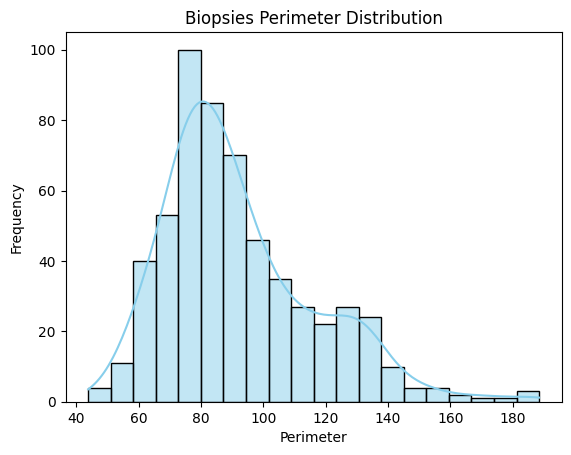

In [ ]:
sns.histplot(df['perimeter_mean'],bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Biopsies Perimeter Distribution')
plt.xlabel('Perimeter')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

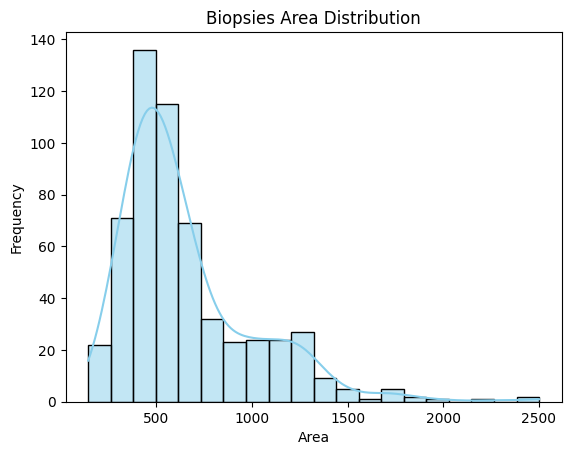

In [ ]:
sns.histplot(df['area_mean'],bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Biopsies Area Distribution')
plt.xlabel('Area')
plt.ylabel('Frequency')

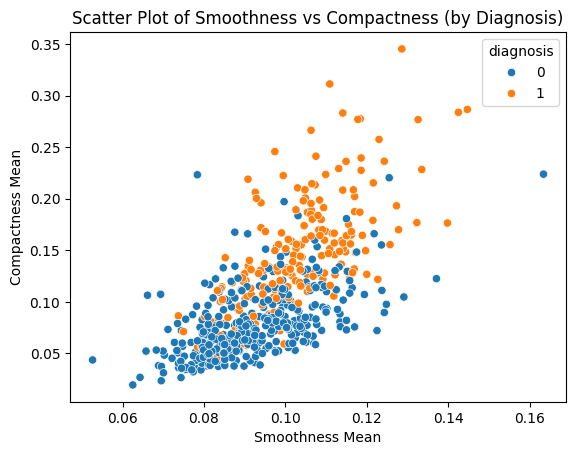

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with color encoding based on diagnosis
sns.scatterplot(x='smoothness_mean', y='compactness_mean', hue='diagnosis', data=df)

plt.title('Scatter Plot of Smoothness vs Compactness (by Diagnosis)')
plt.xlabel('Smoothness Mean')
plt.ylabel('Compactness Mean')
plt.show()


<ipython-input-19-525dda6e93d4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='diagnosis', data=df, palette='pastel')


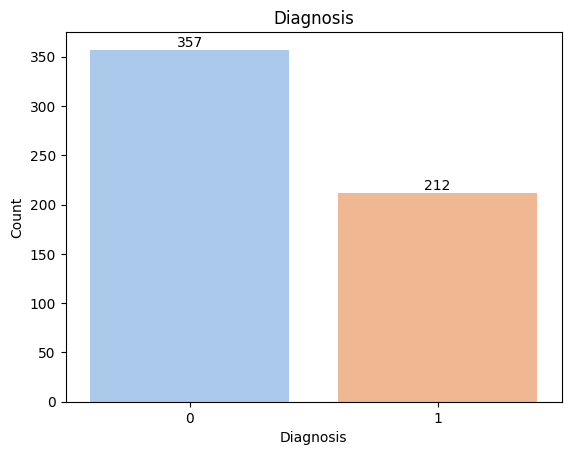

In [ ]:
ax = sns.countplot(x='diagnosis', data=df, palette='pastel')
counts = df['diagnosis'].value_counts()
for i, count in enumerate(counts):
    ax.text(i, count, str(count), ha='center', va='bottom')
plt.title('Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [ ]:
count_M = df[df['diagnosis'] == 1].shape[0]
count_B = df[df['diagnosis'] == 0].shape[0]

total_count = df.shape[0]

percentage_M = (count_M / total_count) * 100
percentage_B = (count_B / total_count) * 100

print(f"Percentage of malignant cases: {round(percentage_M,2)}%")
print(f"Percentage of benign cases: {round(percentage_B,2)}%" )

Percentage of malignant cases: 37.26%
Percentage of benign cases: 62.74%


<ipython-input-21-010591fd1151>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-21-010591fd1151>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-21-010591fd1151>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in s

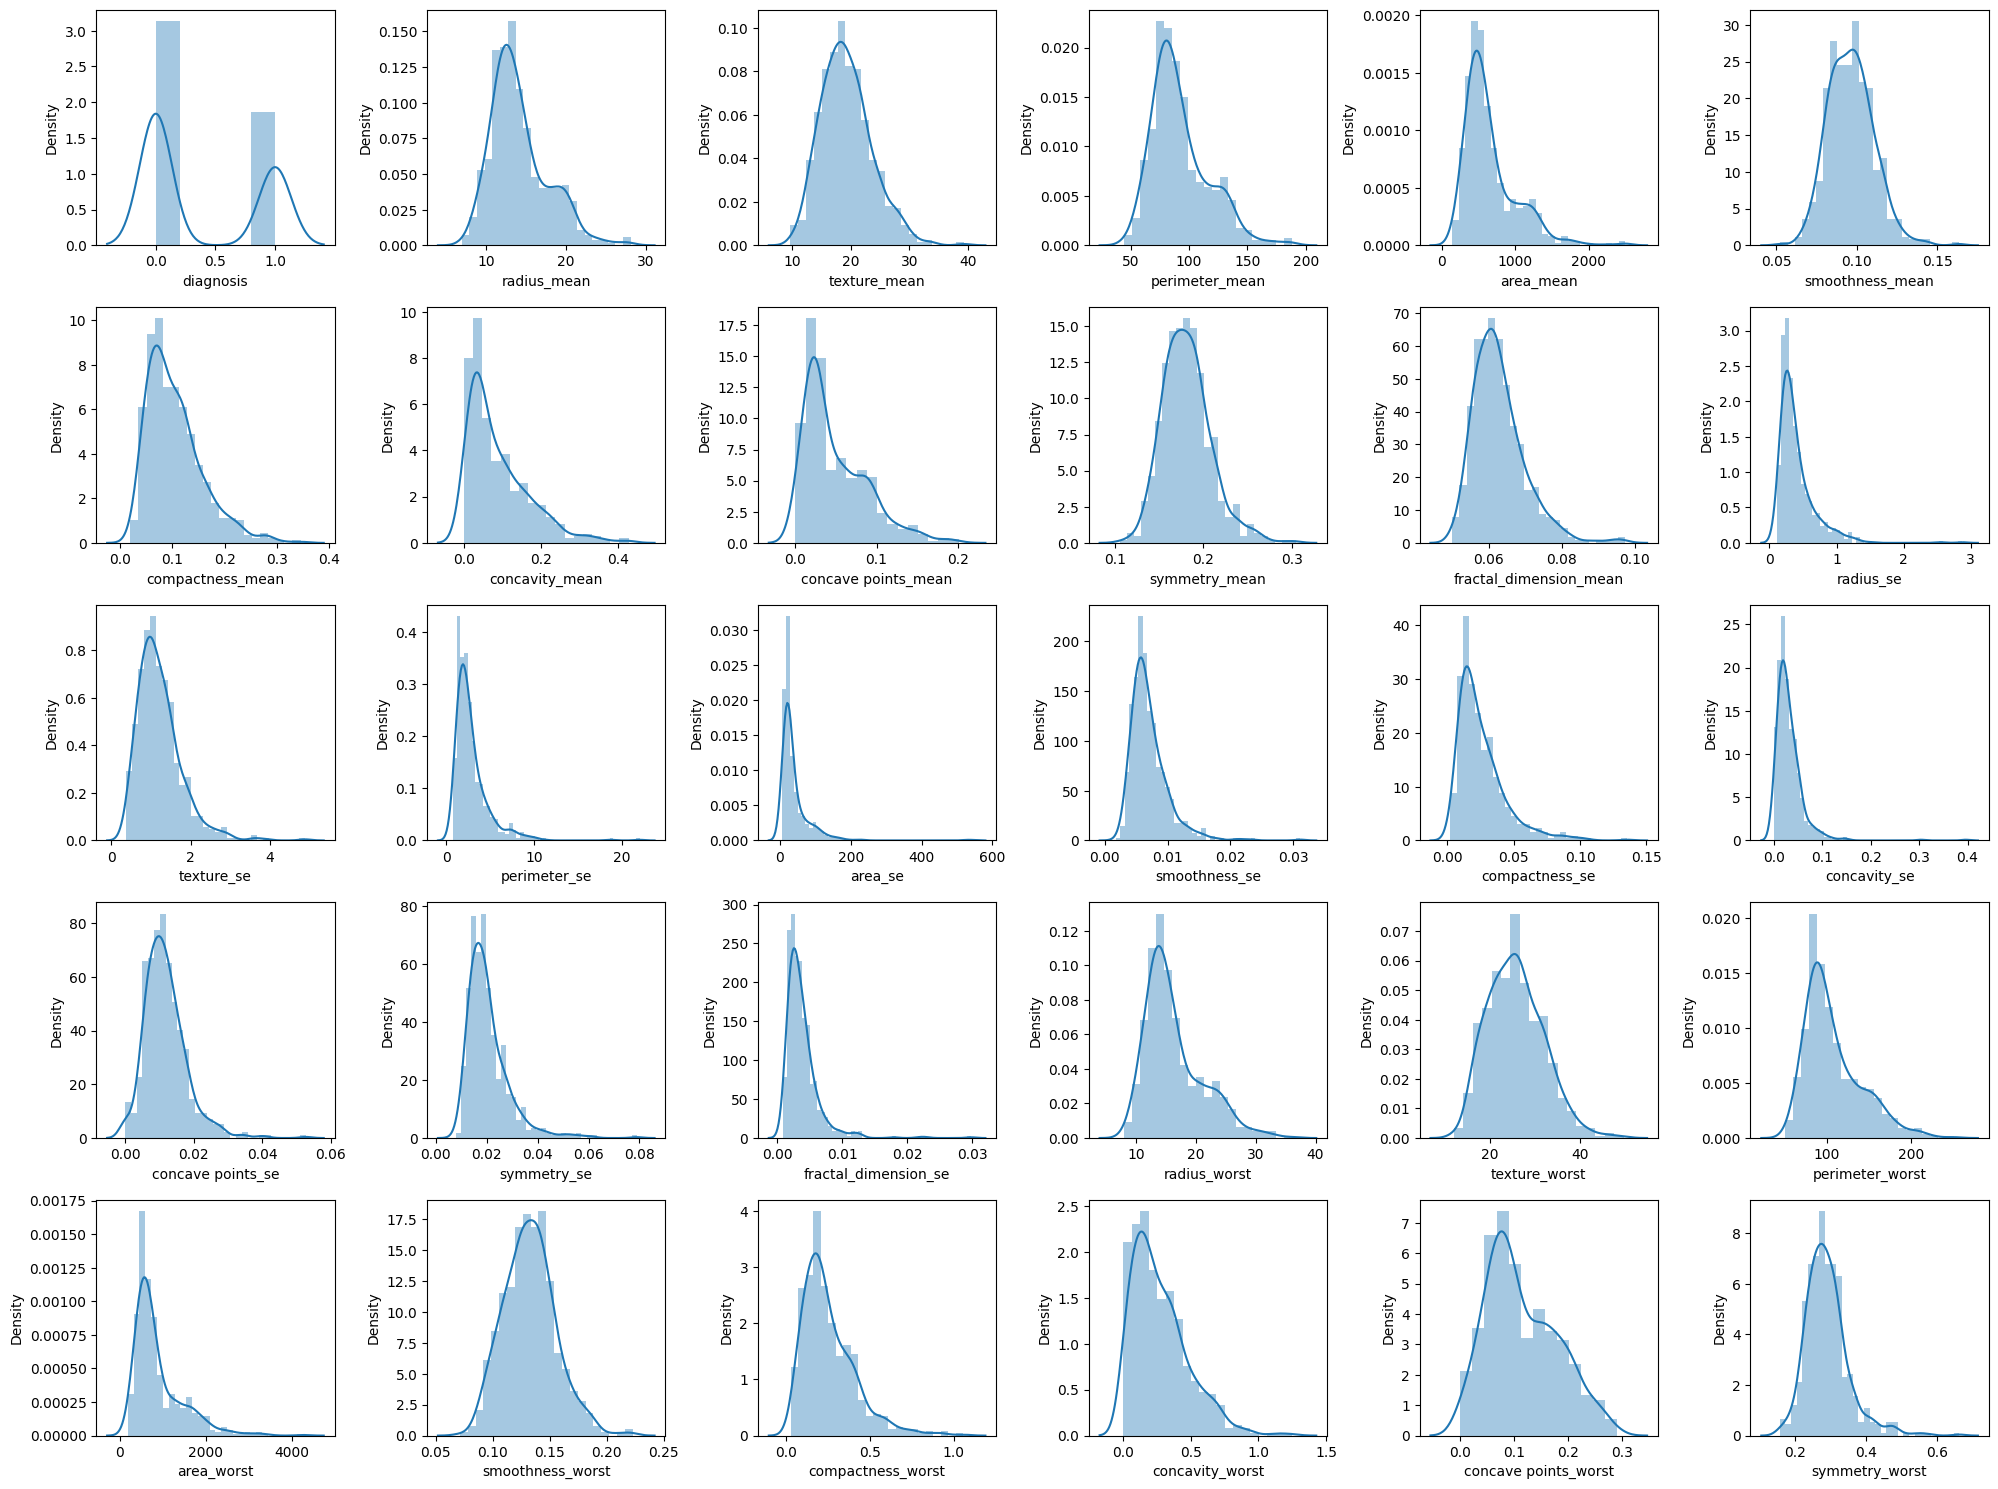

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

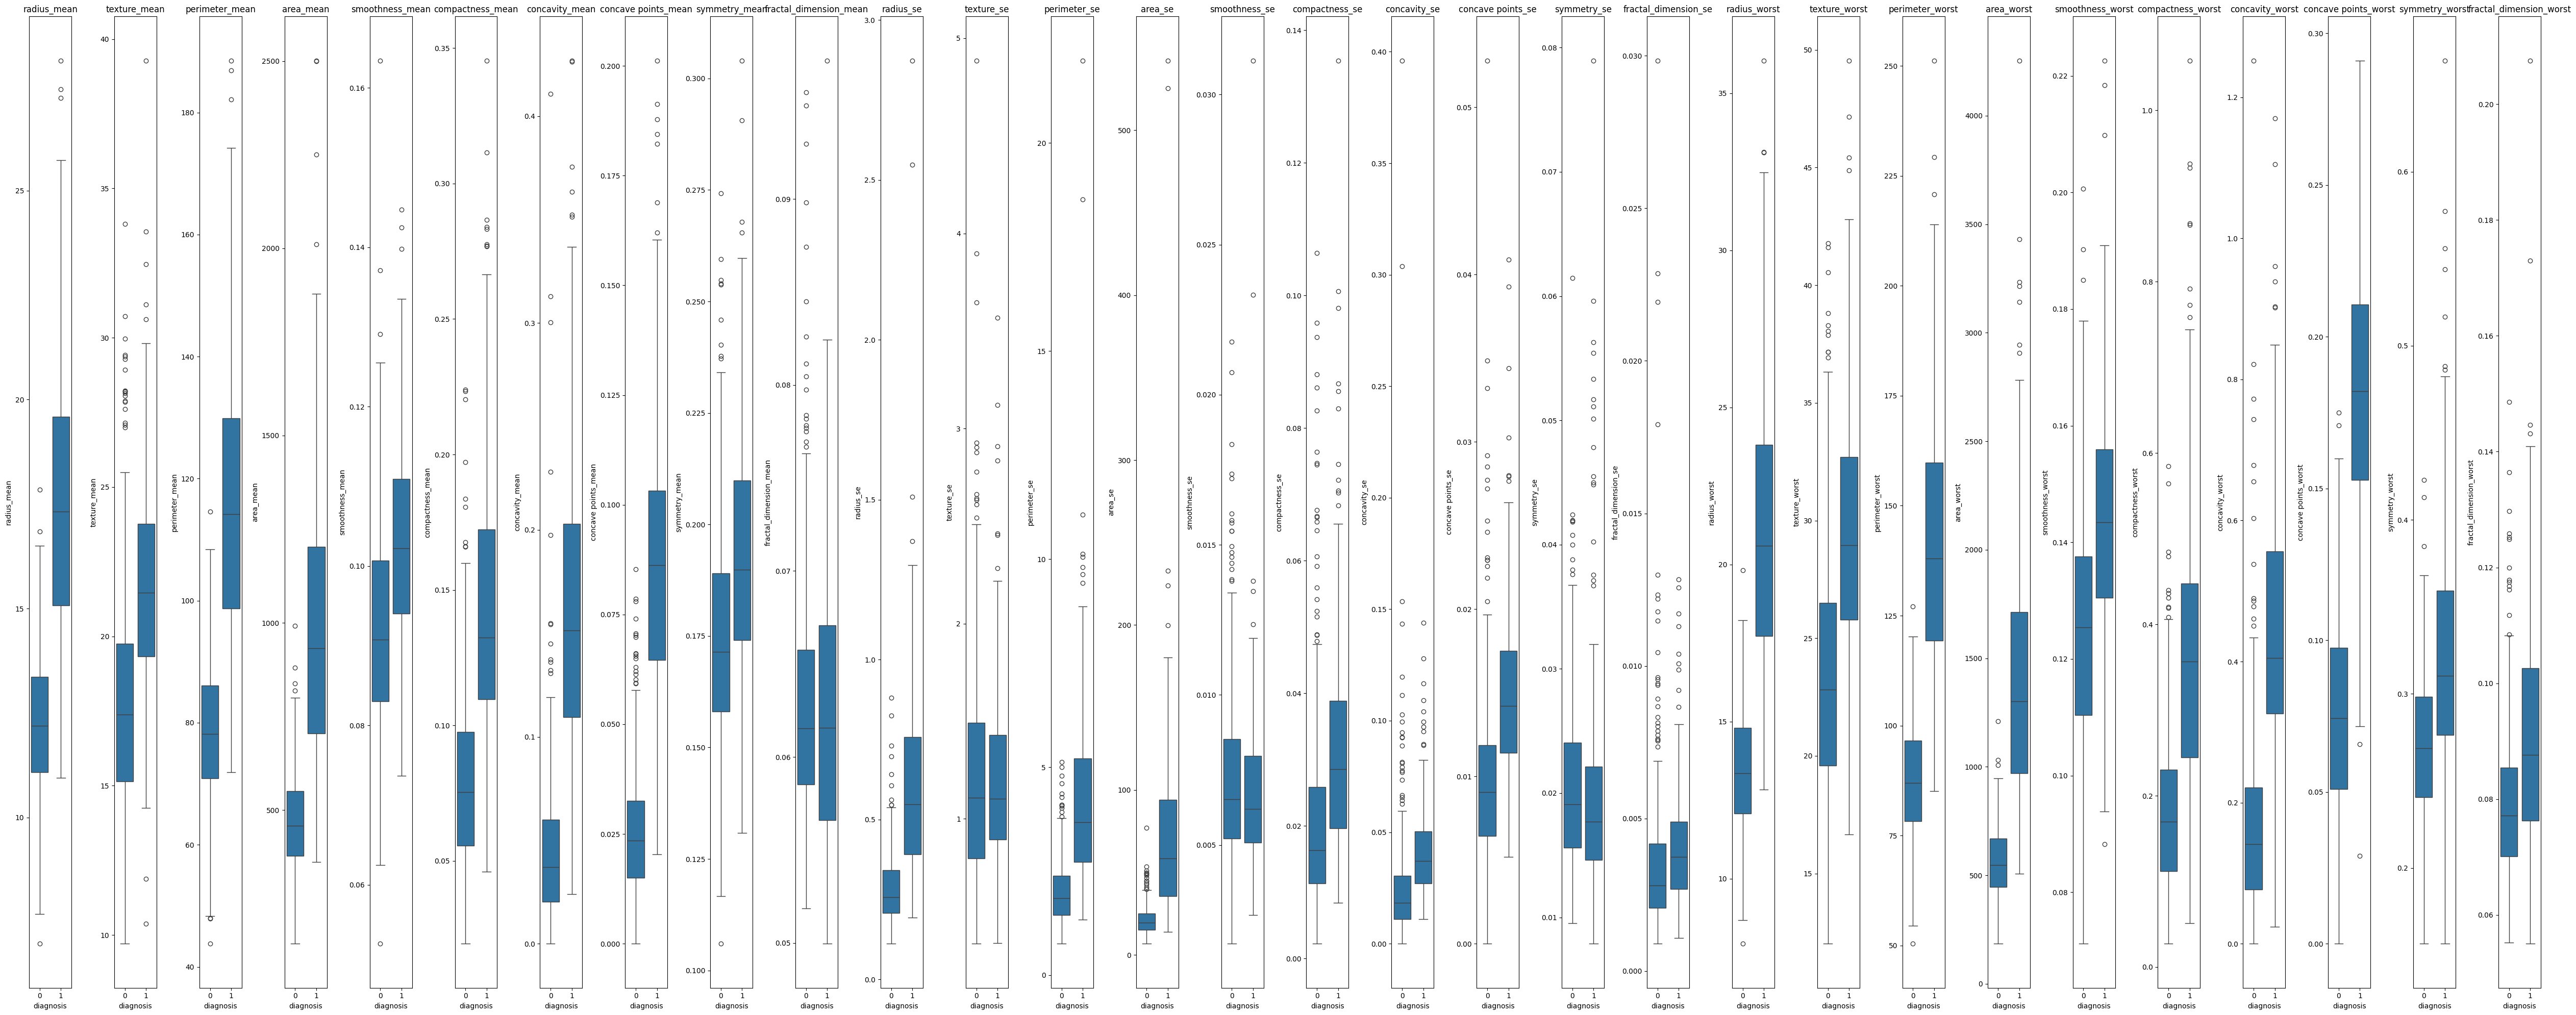

In [ ]:
nume_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
             'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se',
             'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
             'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
             'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
             'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

fig, axes = plt.subplots(nrows=1, ncols=len(nume_cols), figsize=(50, 20))
for ax, col in zip(axes, nume_cols):
    sns.boxplot(x='diagnosis', y=col, data=df, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()


### Correlation

<Axes: >

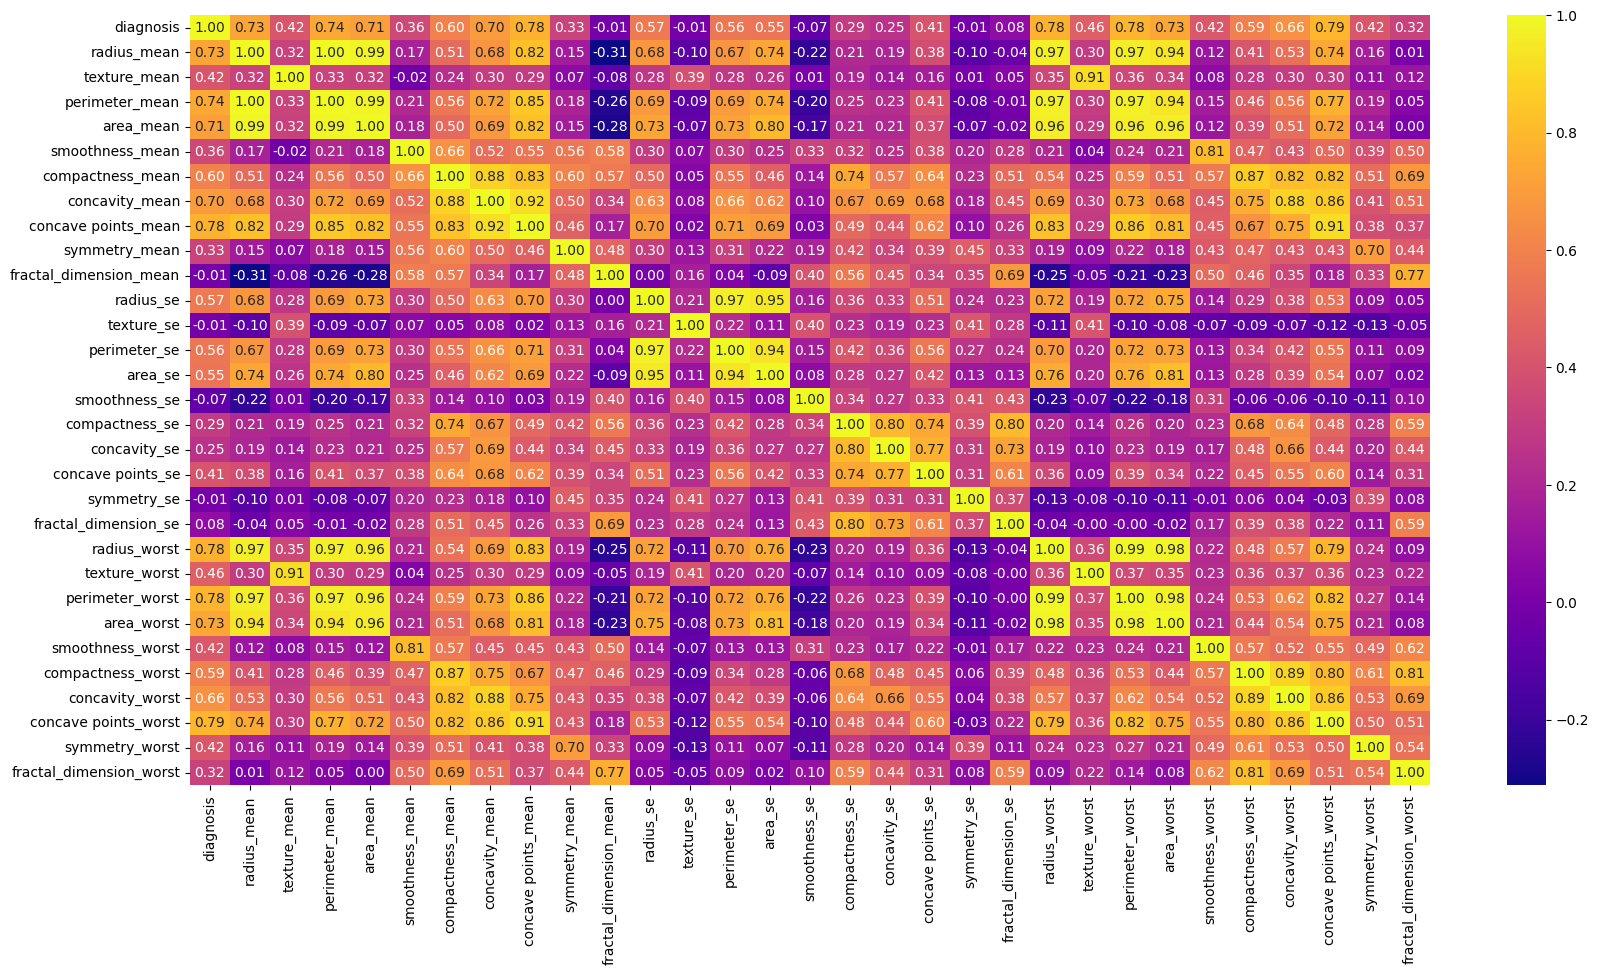

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), cmap= 'plasma',annot = True , fmt='.2f' )

In [ ]:
# checking correlation of independent variable with dependent variable i.e diagnosis
df.corr()['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

### 1. Hold Out Method (Test Size = 33.3%)



In [ ]:
# Split the dataset into features (X) and target labels (y)
x = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Split the data into training and testing sets using the holdout method
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.333, random_state=42)

# Explore the shape of the datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (379, 30)
Shape of X_test: (190, 30)
Shape of y_train: (379,)
Shape of y_test: (190,)


### 1.1. Naive Bayes Classification

In [ ]:
# Train a Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model's performance
accuracy_nb1 = accuracy_score(y_test, predictions)
print("Accuracy on Hold Out method using Naive Bayers classification:", accuracy_nb1*100,"%")

report = classification_report(y_test, predictions)
print("Classification Report for Naive Bayers:\n", report)

Accuracy on Hold Out method using Naive Bayers classification: 94.21052631578948 %
Classification Report for Naive Bayers:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       122
           1       0.93      0.91      0.92        68

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190



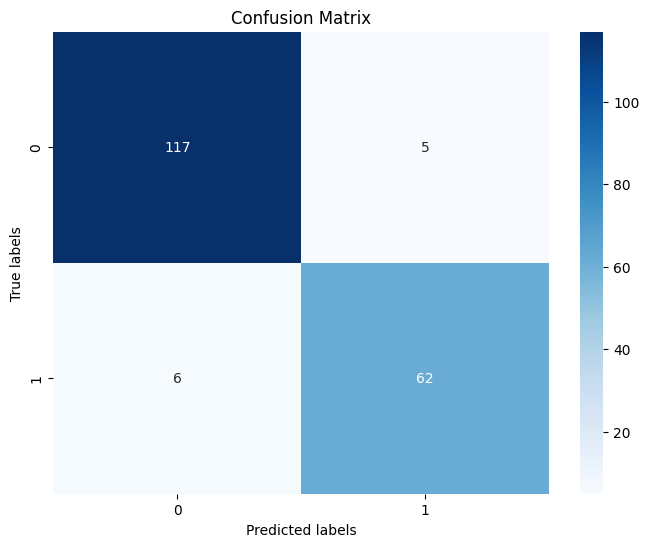

In [ ]:
# Construct a confusion matrix
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### 1.2. K-Nearest Neighbours Classification



In [ ]:
k = 5  # Number of neighbors
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model's performance
accuracy_knn1 = accuracy_score(y_test, predictions)
print("Accuracy on Hold Out method using classification:", accuracy_knn1*100,"%")

report = classification_report(y_test, predictions)
print("Classification Report for KNN:\n", report)

Accuracy on Hold Out method using classification: 95.26315789473684 %
Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       122
           1       0.93      0.94      0.93        68

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190



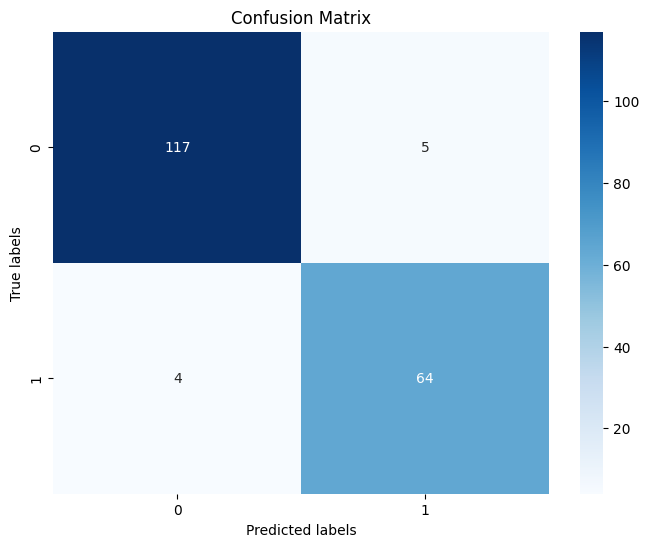

In [ ]:
# Construct a confusion matrix
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### 1.3. Decision Tree

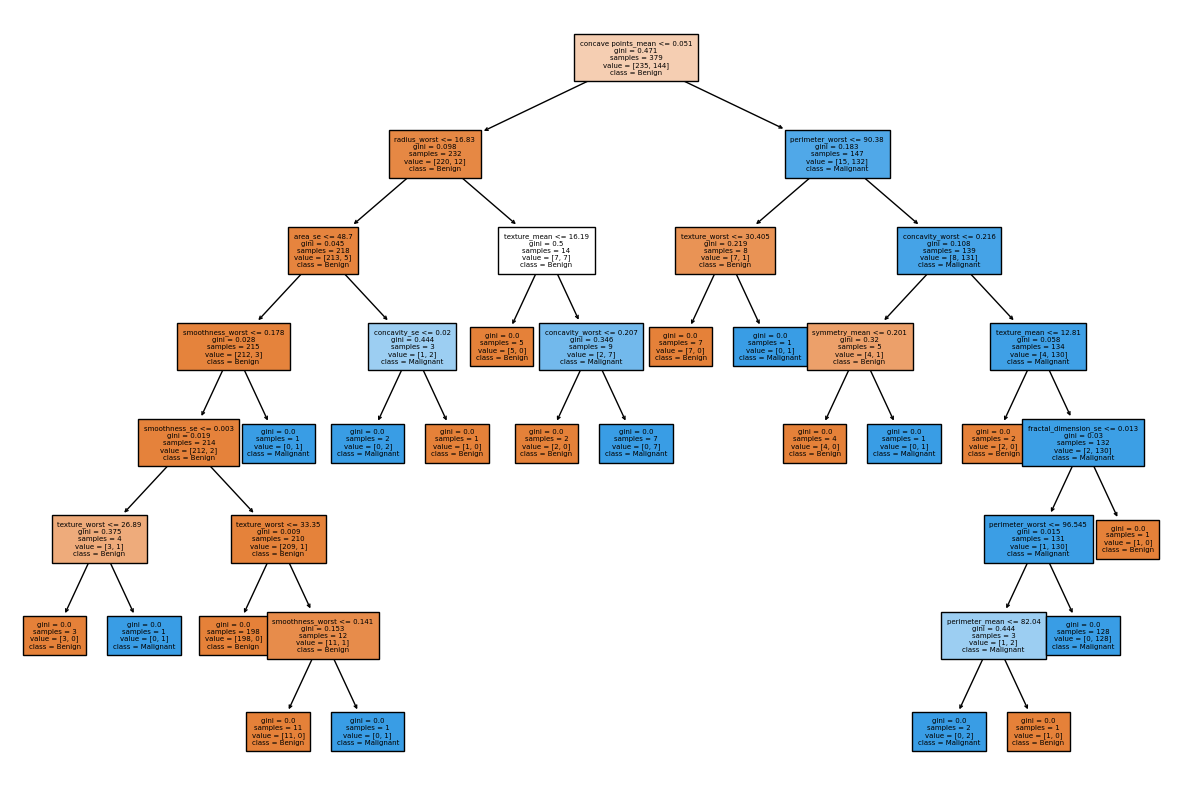

In [ ]:
# Train a Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Plot the Decision Tree
plt.figure(figsize=(15,10))
plot_tree(model, filled=True, feature_names=x.columns, class_names=['Benign', 'Malignant'], fontsize=5)
plt.show()

In [ ]:
# Evaluate the model's performance
accuracy_dt1 = accuracy_score(y_test, predictions)
print("Accuracy on Hold Out method using classification:", accuracy_dt1*100,"%")

report = classification_report(y_test, predictions)
print("Classification Report for Decision Tree:\n", report)

Accuracy on Hold Out method using classification: 91.57894736842105 %
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       122
           1       0.87      0.90      0.88        68

    accuracy                           0.92       190
   macro avg       0.91      0.91      0.91       190
weighted avg       0.92      0.92      0.92       190



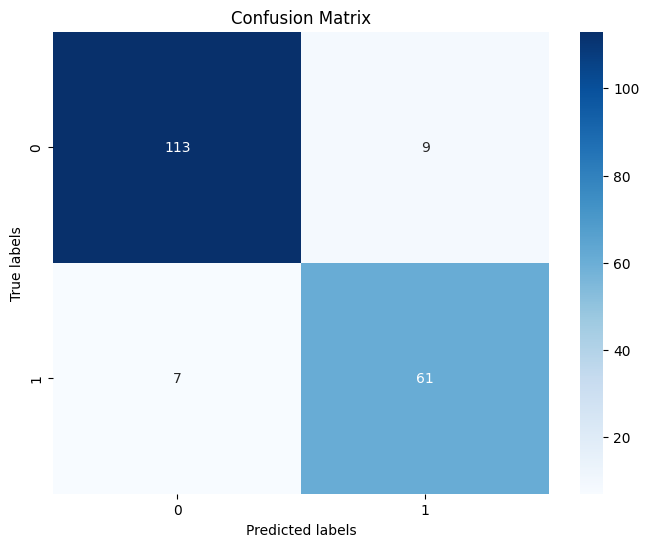

In [ ]:
# Construct a confusion matrix
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### 2. Random Subsampling

In [ ]:

# Number of iterations for random subsampling
iterations = 10
test_size = 0.333

dt_accuracies = []
dt_reports = []
knn_accuracies = []
knn_reports = []
nb_accuracies = []
nb_reports = []

for i in range(iterations):

    # Splitting the dataset
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=i)

    # Decision Tree Classification
    deci_tree = DecisionTreeClassifier(criterion='entropy')
    deci_tree.fit(X_train, y_train)
    prediction_dt = deci_tree.predict(X_test)
    accuracy_dt = accuracy_score(y_test, prediction_dt)
    dt_accuracies.append(accuracy_dt)
    report_dt = classification_report(y_test, prediction_dt)
    dt_reports.append(report_dt)

    # KNearest Neighbour Classification
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    prediction_knn = knn.predict(X_test)
    accuracy_knn = accuracy_score(y_test, prediction_knn)
    knn_accuracies.append(accuracy_knn)
    report_knn = classification_report(y_test, prediction_knn)
    knn_reports.append(report_knn)

    # Naive Bayes
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    prediction_nb = nb.predict(X_test)
    accuracy_nb = accuracy_score(y_test, prediction_nb)
    nb_accuracies.append(accuracy_nb)
    report_nb = classification_report(y_test, prediction_nb)
    nb_reports.append(report_nb)

# Average accuracies
accuracy_dt2 = np.mean(dt_accuracies)
accuracy_knn2 = np.mean(knn_accuracies)
accuracy_nb2 = np.mean(nb_accuracies)

print("Average Accuracy on Random Subsampling method using Decision Tree classification:", accuracy_dt2 * 100, "%")
print("Average Accuracy on Random Subsampling method using KNearest Neighbor classification:", accuracy_knn2 * 100, "%")
print("Average Accuracy on Random Subsampling method using Naive Bayes classification:", accuracy_nb2 * 100, "%")

# Print classification reports
print("\n\nClassification Report for Decision Tree:")
print(dt_reports[0])
print("\nClassification Report for KNearest Neighbor:")
print(knn_reports[0])
print("\nClassification Report for Naive Bayes:")
print(nb_reports[0])


Average Accuracy on Random Subsampling method using Decision Tree classification: 93.6842105263158 %
Average Accuracy on Random Subsampling method using KNearest Neighbor classification: 93.47368421052632 %
Average Accuracy on Random Subsampling method using Naive Bayes classification: 94.42105263157895 %


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       122
           1       0.88      0.93      0.90        68

    accuracy                           0.93       190
   macro avg       0.92      0.93      0.92       190
weighted avg       0.93      0.93      0.93       190


Classification Report for KNearest Neighbor:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       122
           1       0.91      0.94      0.93        68

    accuracy                           0.95       190
   macro avg       0.94      0.95      0.94       190
weigh



Confusion Matrix for Decision Tree:


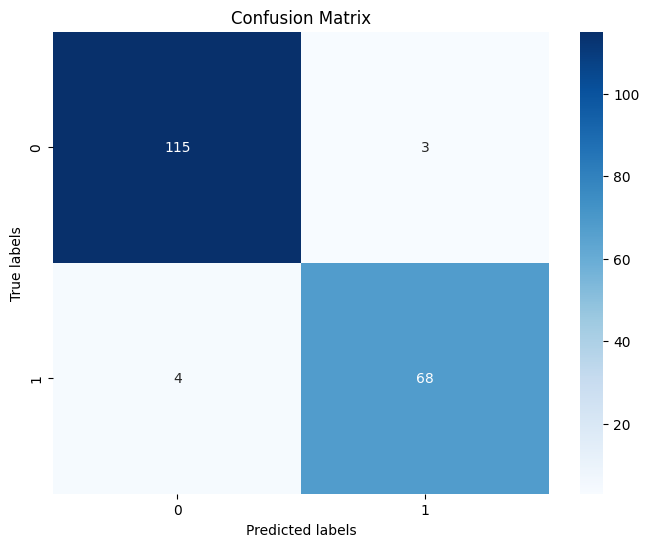


Confusion Matrix for KNearest Neighbor:


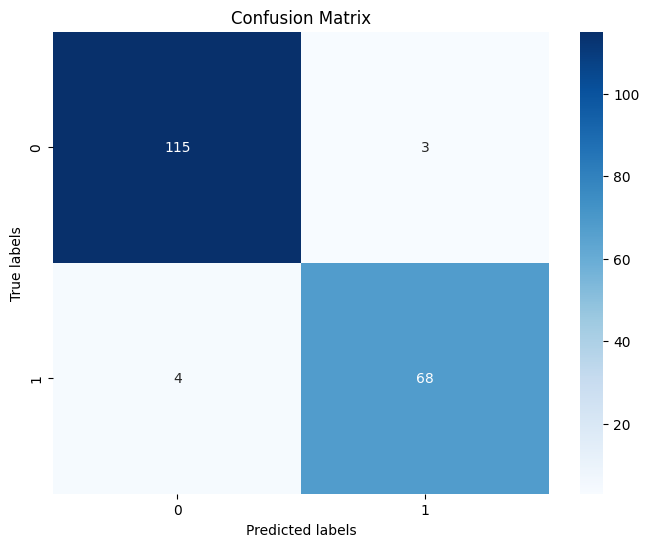


Confusion Matrix for Naive Bayes:


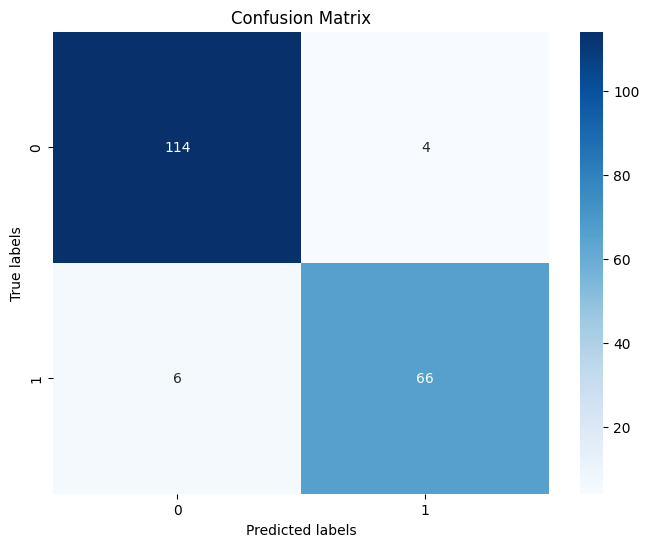

In [ ]:
conf_matrix_dt = confusion_matrix(y_test, prediction_dt)
conf_matrix_knn = confusion_matrix(y_test, prediction_knn)
conf_matrix_nb = confusion_matrix(y_test, prediction_nb)

print("\n\nConfusion Matrix for Decision Tree:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("\nConfusion Matrix for KNearest Neighbor:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("\nConfusion Matrix for Naive Bayes:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## 3. Cross-Validation

### 3.1. Decision Tree

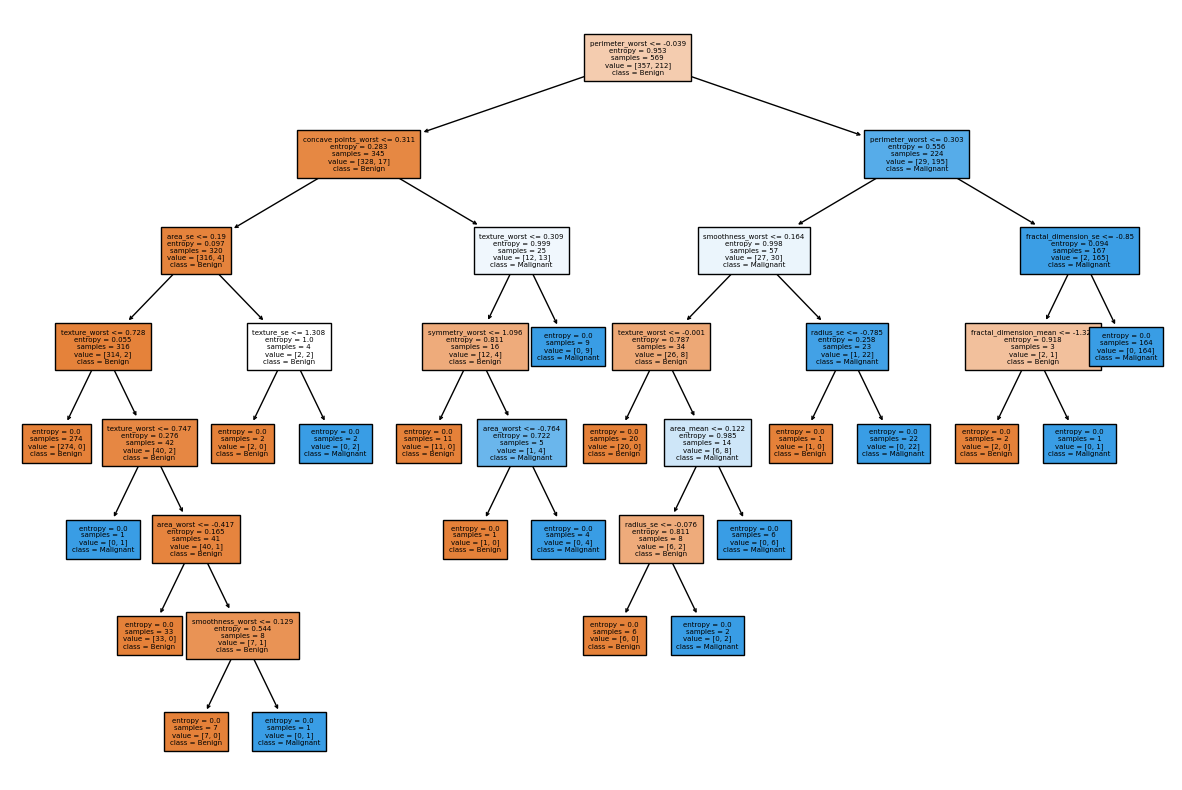

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

deci_tree1 = DecisionTreeClassifier(criterion='entropy')
deci_tree1.fit(X_scaled, y)
dt_scores = cross_val_score(deci_tree, X_scaled, y, cv=10)
accuracy_dt3 = np.mean(dt_scores)
dt_predictions = cross_val_predict(deci_tree, X_scaled, y, cv=10)
dt_report = classification_report(y, dt_predictions)

plt.figure(figsize=(15,10))
plot_tree(deci_tree1, filled=True, feature_names=x.columns, class_names=['Benign', 'Malignant'], fontsize=5)
plt.show()

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       357
           1       0.89      0.90      0.90       212

    accuracy                           0.92       569
   macro avg       0.92      0.92      0.92       569
weighted avg       0.92      0.92      0.92       569

Average Accuracy for Decision Tree: 93.31766917293234

Confusion Matrix for Naive Bayes:


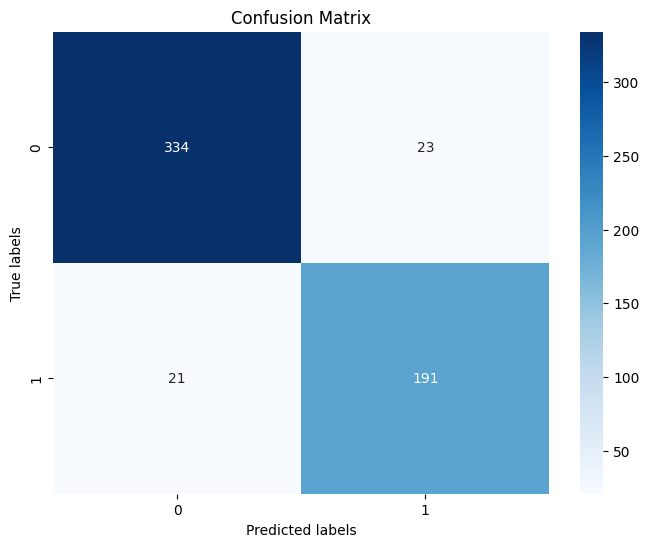

In [ ]:
print("Classification Report for Decision Tree:")
print(dt_report)
print("Average Accuracy for Decision Tree:", accuracy_dt3 * 100)

conf_matrix_dt_cv = confusion_matrix(y, dt_predictions)

# Print confusion matrix
print("\nConfusion Matrix for Naive Bayes:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt_cv, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### 3.2. KNearest Neighbors Classifier




Classification Report for KNearest Neighbor:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       357
           1       0.98      0.93      0.95       212

    accuracy                           0.97       569
   macro avg       0.97      0.96      0.96       569
weighted avg       0.97      0.97      0.97       569

Average Accuracy for KNearest Neighbor: 96.66353383458647

Confusion Matrix for KNearest Neighbor:


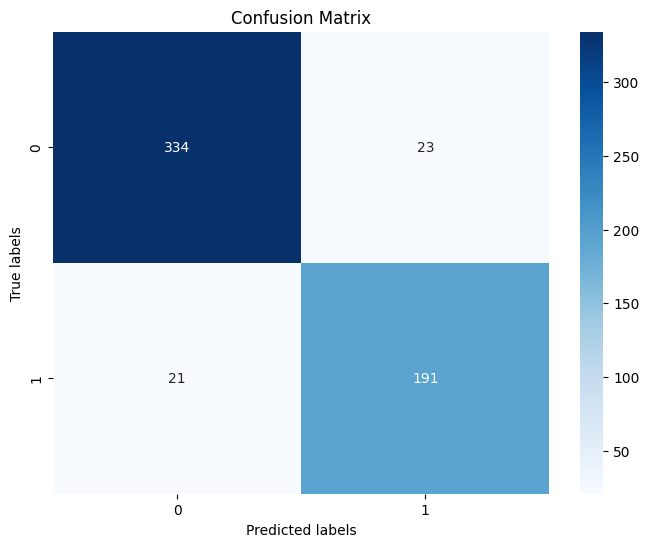

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

knn = KNeighborsClassifier()
knn_scores = cross_val_score(knn, X_scaled, y, cv=10)
accuracy_knn3 = np.mean(knn_scores)
knn_predictions = cross_val_predict(knn, X_scaled, y, cv=10)
knn_report = classification_report(y, knn_predictions)
print("\nClassification Report for KNearest Neighbor:")
print(knn_report)
print("Average Accuracy for KNearest Neighbor:", accuracy_knn3 * 100)

conf_matrix_knn_cv = confusion_matrix(y, knn_predictions)

# Print confusion matrix
print("\nConfusion Matrix for KNearest Neighbor:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt_cv, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### 3.3. Naive Bayes


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       357
           1       0.91      0.90      0.91       212

    accuracy                           0.93       569
   macro avg       0.93      0.93      0.93       569
weighted avg       0.93      0.93      0.93       569

Average Accuracy for Naive Bayes: 93.15162907268169

Confusion Matrix for Naive Bayes:


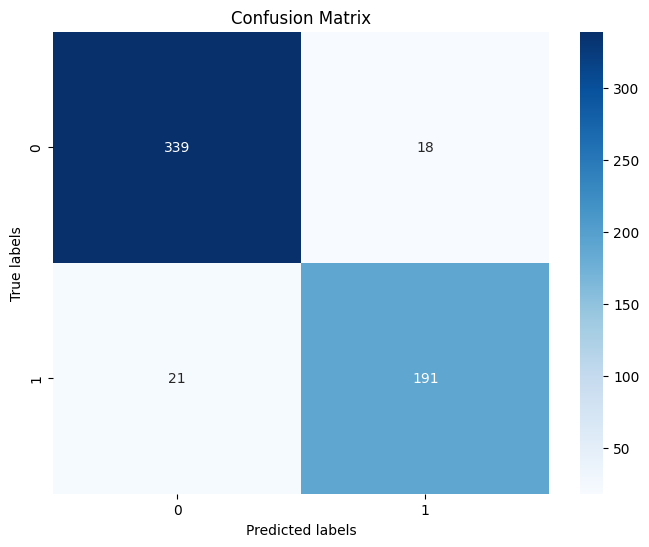

In [ ]:
nb = GaussianNB()
nb_scores = cross_val_score(nb, X_scaled, y, cv=10)
accuracy_nb3 = np.mean(nb_scores)
nb_predictions = cross_val_predict(nb, X_scaled, y, cv=10)
nb_report = classification_report(y, nb_predictions)
print("\nClassification Report for Naive Bayes:")
print(nb_report)
print("Average Accuracy for Naive Bayes:", accuracy_nb3 * 100)

conf_matrix_nb_cv = confusion_matrix(y, nb_predictions)

# Print confusion matrix
print("\nConfusion Matrix for Naive Bayes:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb_cv, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()